  0%|          | 0/1000 [00:00<?, ?it/s]

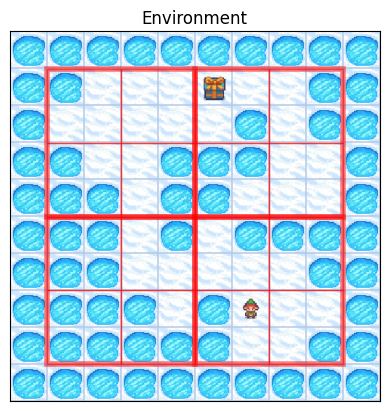

In [1]:
import sys
from tqdm.auto import tqdm
sys.path.append("..")
from mango.environments import frozen_lake
import utils

params = {"map_name":"RANDOM", "p":0.5, "shape":(8,8), "seed":0}
env = frozen_lake.CustomFrozenLakeEnv(**params)
env = frozen_lake.wrappers.ReInitOnReset(env, **params)
env = frozen_lake.wrappers.TensorObservation(env, one_hot=True)
for i in tqdm(range(1000)):
    obs, info = env.reset()
#print(f"Observation:\n {obs.__repr__()}")
utils.render(env, abstraction_sizes=[(2,2), (4, 4)])